In [27]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy

import warnings
warnings.filterwarnings("ignore")


In [4]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data_df=pd.read_csv('housing.csv', header=None, delim_whitespace=True, names=column_names)
data_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


# Business Objectives


* Fitur apa saja yang mempengaruhi harga rumah di Boston?

## Information Needed

Each record in the database describes a Boston suburb or town. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. The attributes are deﬁned as follows (taken from the UCI Machine Learning Repository1): 

* CRIM: per capita crime rate by town

* ZN: proportion of residential land zoned for lots over 25,000 sq.ft.

* INDUS: proportion of non-retail business acres per town

* CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

* NOX: nitric oxides concentration (parts per 10 million)

* RM: average number of rooms per dwelling

* AGE: proportion of owner-occupied units built prior to 1940

* DIS: weighted distances to ﬁve Boston employment centers

* RAD: index of accessibility to radial highways

* TAX: full-value property-tax rate per $10,000

* PTRATIO: pupil-teacher ratio by town 

* B: 1000(Bk−0.63)2 where Bk is the proportion of blacks by town 

* LSTAT: % lower status of the population

* MEDV: Median value of owner-occupied homes in $1000s

We can see that the input attributes have a mixture of units.



# Data Understanding

In [ ]:
cat_features=data_df.select_dtypes(exclude=np.number).columns
cont_features=data_df.select_dtypes(include=[np.number,'float64','int64']).columns

In [7]:
data_df.shape

(506, 14)

Data memiliki 506 baris dan 14 kolom

In [5]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


Dataset memiliki 506 baris, dan methode info menunjukkan bahwa tidak terdaat adanya missing values pada dataset ini. kemudian tipe data dari setiap kolom adalah float dan integer, yang artinya dataset tidak memiliki kolom kategorikal sehingga tidak perlu dilakukan encoding

In [17]:
for col in list(data_df):
    print(data_df[col].unique())

[6.32000e-03 2.73100e-02 2.72900e-02 3.23700e-02 6.90500e-02 2.98500e-02
 8.82900e-02 1.44550e-01 2.11240e-01 1.70040e-01 2.24890e-01 1.17470e-01
 9.37800e-02 6.29760e-01 6.37960e-01 6.27390e-01 1.05393e+00 7.84200e-01
 8.02710e-01 7.25800e-01 1.25179e+00 8.52040e-01 1.23247e+00 9.88430e-01
 7.50260e-01 8.40540e-01 6.71910e-01 9.55770e-01 7.72990e-01 1.00245e+00
 1.13081e+00 1.35472e+00 1.38799e+00 1.15172e+00 1.61282e+00 6.41700e-02
 9.74400e-02 8.01400e-02 1.75050e-01 2.76300e-02 3.35900e-02 1.27440e-01
 1.41500e-01 1.59360e-01 1.22690e-01 1.71420e-01 1.88360e-01 2.29270e-01
 2.53870e-01 2.19770e-01 8.87300e-02 4.33700e-02 5.36000e-02 4.98100e-02
 1.36000e-02 1.31100e-02 2.05500e-02 1.43200e-02 1.54450e-01 1.03280e-01
 1.49320e-01 1.71710e-01 1.10270e-01 1.26500e-01 1.95100e-02 3.58400e-02
 4.37900e-02 5.78900e-02 1.35540e-01 1.28160e-01 8.82600e-02 1.58760e-01
 9.16400e-02 1.95390e-01 7.89600e-02 9.51200e-02 1.01530e-01 8.70700e-02
 5.64600e-02 8.38700e-02 4.11300e-02 4.46200e-02 3.

Jika dilihat dari nilai unik setiap kolom tidak terindikasi bahwa dataset memiliki data yang missing, sehingga kita tidak perlu melakukan treatment missing values pada data

In [ ]:
data_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


secara summary statistik rata-rata proporsi unit yang ditempati pemilik yang dibangun sebelum tahun 1940 adalah 68. 

# Exploratory Data Analysis
## **STEP 1: UNIVARIATE ANALYSIS**

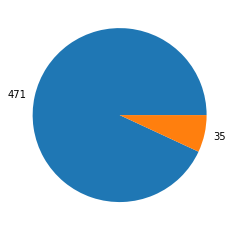

In [18]:

plt.pie(data_df['CHAS'].value_counts(), labels=data_df['CHAS'].value_counts());

Dari plot diatas, dapat dilihat bahwa mayoritas warga Boston hidup tidak berada dekat sungai. Hal ini disimpulkan dari hasil plot bahwa sebanyak 35 warga Boston tinggal di dekat sungai sedangkan 471 warga tidak. 

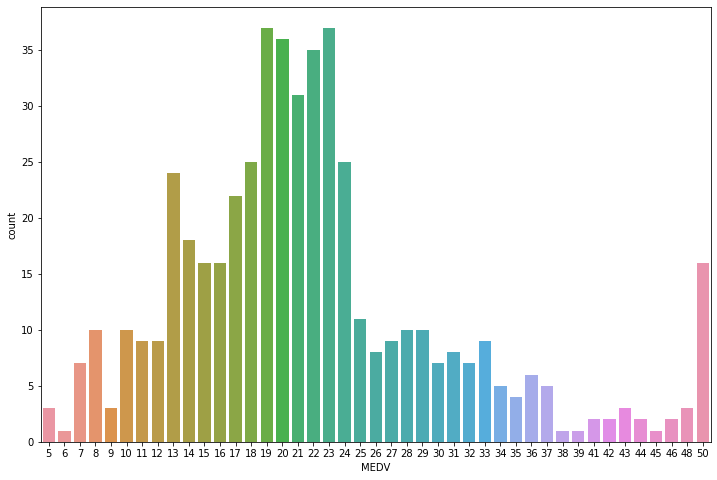

In [23]:



plt.figure(figsize=(12,8))
data_df.MEDV=data_df.MEDV.astype('int64')

sns.countplot(x= data_df['MEDV']);

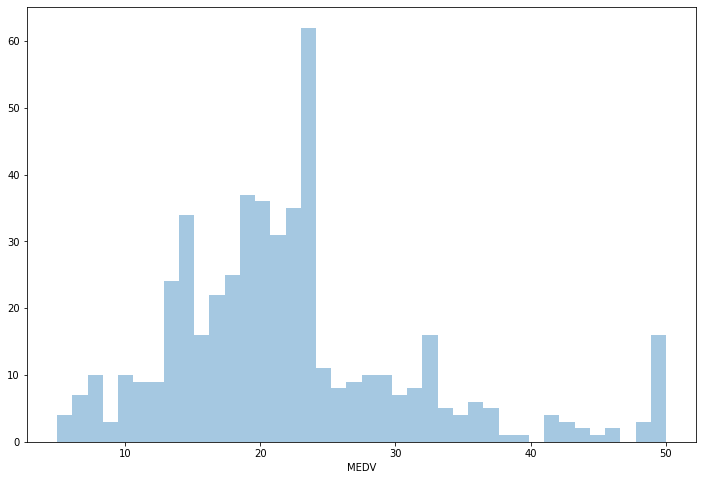

In [28]:
plt.figure(figsize=(12,8))
sns.distplot(data_df['MEDV'],kde=False, bins=40);

Dari distribusi data MEDV diatas, terlihat bahwa nilai modus MEDV berada pada rentang sekitar 23 dengan skewness positif.

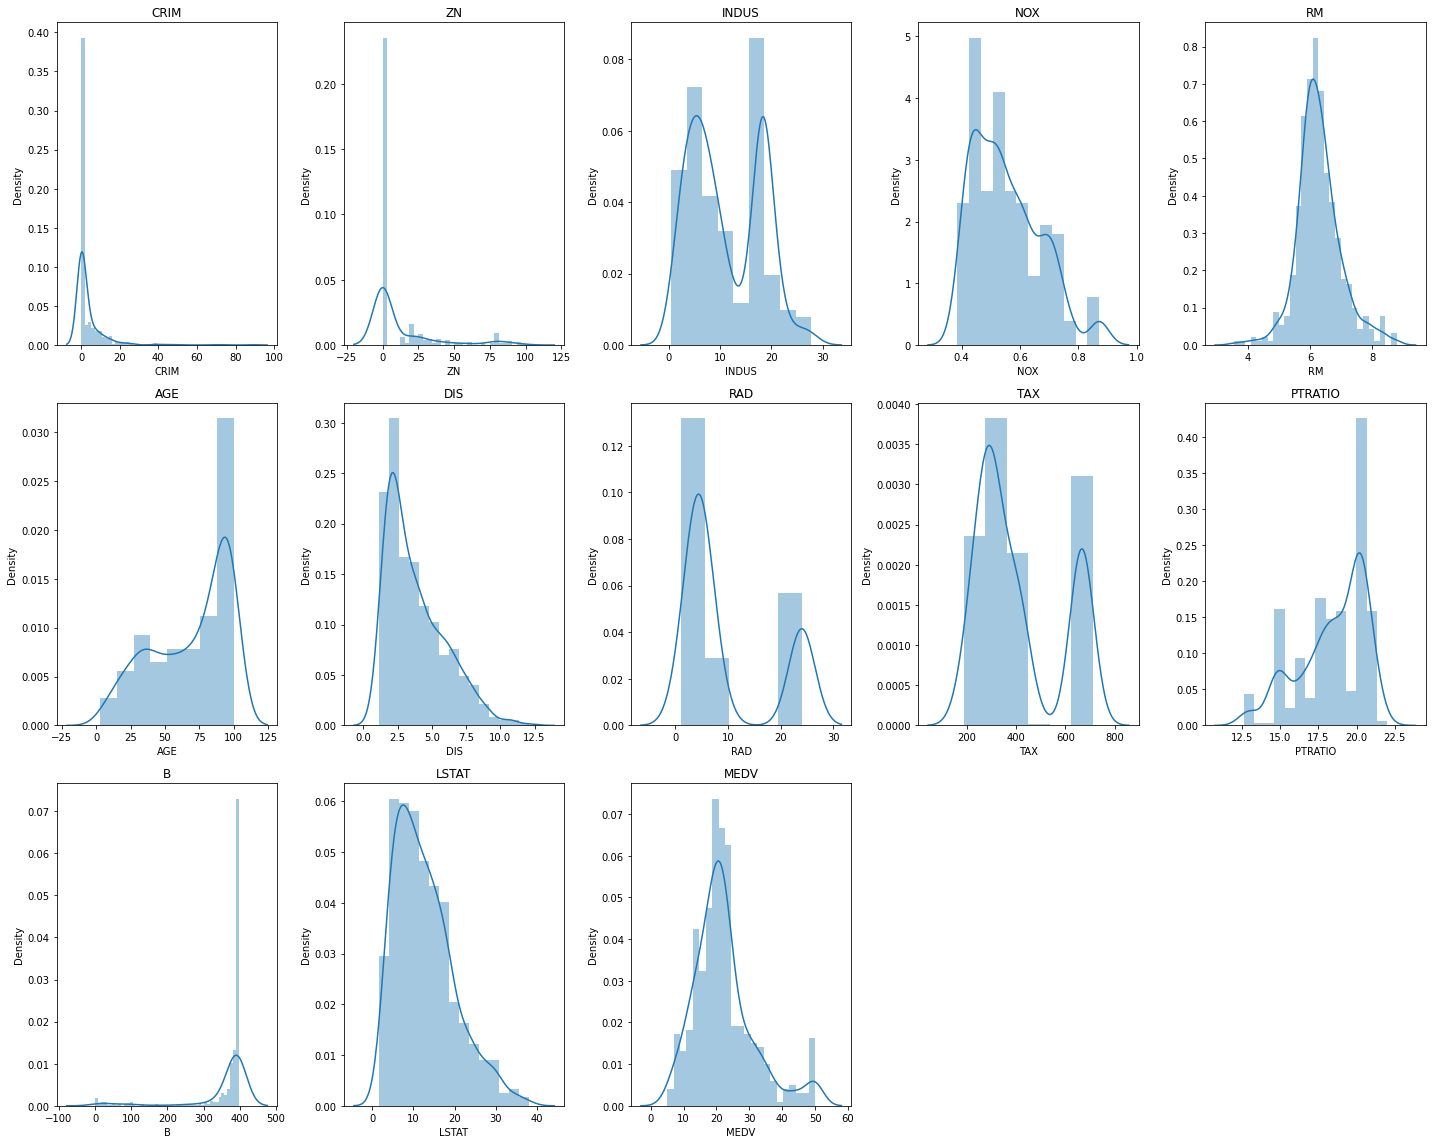

In [30]:
import numpy as np
import seaborn as sns

cont_features = data_df.drop('CHAS', axis=1)
cont_dummy=cont_features
plt.figure(figsize=(20,16))
for index, col in enumerate(cont_dummy, start=1):
    plt.subplot(3,5,index)
    plt.title(col)
    plt.tight_layout(1.08)
    ax = sns.distplot(data_df[col], kde=True)


In [31]:
import scipy
from scipy.stats import norm, kurtosis
data = norm.rvs(size=1000, random_state=3)
from scipy.stats import kurtosis


for index, col in enumerate(cont_dummy, start=1):
    print("Kurtosis untuk ",col,": ",kurtosis(data_df[col]))
    print("Skew untuk ",col,": ",scipy.stats.skew(data_df[col]))
    print("stdev untuk ",col,": ",np.std(data_df[col]))
    print("")

Kurtosis untuk  CRIM :  36.75278626142281
Skew untuk  CRIM :  5.207652387859715
stdev untuk  CRIM :  8.593041351295769

Kurtosis untuk  ZN :  3.9799487739913717
Skew untuk  ZN :  2.219063057148425
stdev untuk  ZN :  23.299395694766027

Kurtosis untuk  INDUS :  -1.2332184715629375
Skew untuk  INDUS :  0.29414627684418543
stdev untuk  INDUS :  6.853570583390873

Kurtosis untuk  NOX :  -0.07586421510237251
Skew untuk  NOX :  0.7271441597740319
stdev untuk  NOX :  0.11576311540656153

Kurtosis untuk  RM :  1.8610269725310244
Skew untuk  RM :  0.40241466802496245
stdev untuk  RM :  0.7019225143345692

Kurtosis untuk  AGE :  -0.97001392664039
Skew untuk  AGE :  -0.5971855948016143
stdev untuk  AGE :  28.121032570236885

Kurtosis untuk  DIS :  0.4712985716109914
Skew untuk  DIS :  1.0087787565152246
stdev untuk  DIS :  2.103628356344459

Kurtosis untuk  RAD :  -0.8705205036905461
Skew untuk  RAD :  1.0018334924536951
stdev untuk  RAD :  8.698651117790645

Kurtosis untuk  TAX :  -1.14298488483

Nilai skewness dan kurtosis menunjukkan apakah data terdistribusi secara normal atau tidak. Data terdistribusi secara normal jika nilai skewness berada dalam rentang -0.5 - +0.5 dengan kurtosis sebesar 3. Dari hasil perhitungan setiap variabel dari dataset, terlihat bahwa distribusi setiap kolom dari dataset tidak terdistribusi secara normal. Hal ini dikarenakan adanya data pencilan.

# Multivariate Analysis

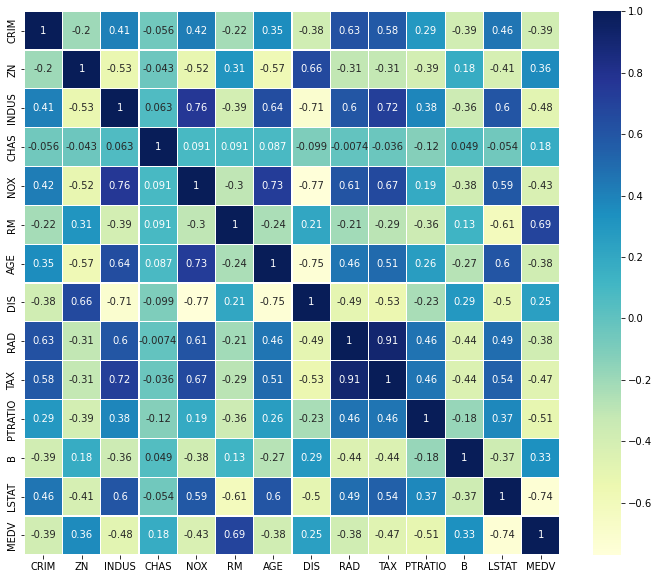

In [32]:
corrmat = data_df.corr(method='pearson')
f, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(corrmat, ax=ax, cmap="YlGnBu", linewidths=0.1, annot=True);

Dari heatmap diatas, yang memiliki korelasi negatif tertinggi terhadap MEDV adalah LSTAT, PTRATIO, TAX, INDUS. Sedangkan yang memiliki korelasi positif tertinggi terhadap MEDV adalah RM. 

Sementara itu, dari data korelasi diatas, luas tanah industri INDUS berbanding lurus dengan jumlah polutan atau konsentrasi NOX di udara. Selain itu, proporsi unit yang ditempati pemilik yang dibangun sebelum 1940 AGE berbanding lurus dengan konsentrasi NOX di udara. Secara implisit, tempat tinggal orang yang sudah memiliki rumah sebelum tahun 1940 (AGE) ternyata memiliki jarak yang jauh dari 5 tempat pusat bisnis di boston (DIS). Status sosialpun (LSTAT) ternyata memiliki hubungan positif terhadap kepemilikan rumah sebelum tahun 1940 (AGE).

Luasan kawasan industri (INDUS) berbanding lurus dengan pajak yang harus dibayarkan oleh pemilik (TAX). Selain itu, harga rumah yang memiliki jarak aksesibilitas dekat dengan jalan tol (RAD), memiliki harga yang lebih rendah (TAX) tetapi perlu dijabarkan lebih lanjut dikhawatirkan terdapat data outlayer yang dapat mempengaruhi hipotesis ini. 

Selain itu, jumlah NOX dan TAX memiliki perbandingan lurus. Ini mungkin terjadi mengingat ada hubungan dekat antara NOX dan dan INDUS. Jarak rumah terhadap jalan tol berbanding terbalik dengan kawasan industri INDUS, konsentrasi polutan NOX, serta rumah yang dimiliki sejak sebelum 1940.

Dari data diatas, dapat dilihat bahwa nilai MEDV dari 5-29 secara umum memiliki variansi yang besar. Sementara itu, secara umum, nilai MEDV dari 30 hingga 50 memiliki variansi yang lebih lebih kecil dari data yang lain. Dari grafik pula, dapat dilihat bahwa korelasi antara LSTAT berbanding MEDV memiliki hubungan terbalik.

Nilai kurtosis adalah ukuran ketajaman kurva terhadap kurva distribusi normal. Ketika nilai kurtosis bernilai nol, maka jenis kurva merupakan kurva distribusi normal. Sementara itu, ketika suatu nilai  kurtosis bernilai positif, maka bentuk puncak dan bahu kurva lebih tajam dibandingkan dengan distribusi normal. Sebaliknya, ketika nilai kurtosis negatif, bentuk puncak dan bahu kurva lebih landai dibandingkan dengan distribusi normal.

# Detect Outliers

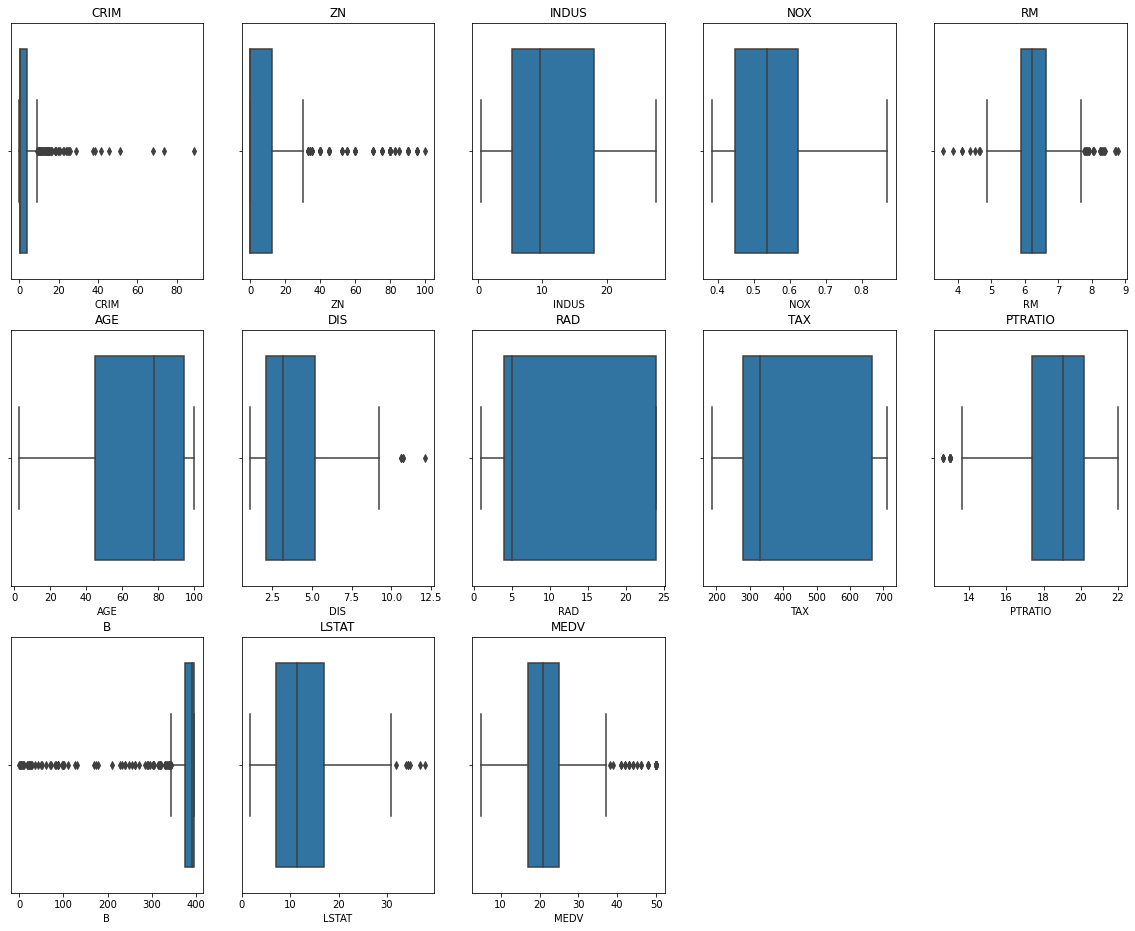

In [33]:
import numpy as np
import seaborn as sns
cont_dummy=cont_features#.drop('store_and_fwd_flag')
plt.figure(figsize=(20,16))
for index, col in enumerate(cont_dummy, start=1):
    plt.subplot(3,5,index)
    plt.title(col)
    ax = sns.boxplot(data_df[col])
    #kde_kws={'bw':0.05})
    #ax.set_yscale('log')

Dari data diatas, dapat dilihat bahwa terdapat beberapa data yang memiliki tingkat variabilitas tinggi yang dapat dipengaruhi oleh outliers: B, LSTAT, MEDV, CRIM, ZN, RM.

##  Detect Outliers

In [34]:
def get_lower_upper_bound(x):
    q1 = np.percentile(x, 25)
    q3 = np.percentile(x, 75)
    iqr = q3-q1
    lower_bound = q1 - (iqr * 1.5)
    upper_bound = q3 + (iqr * 1.5)
    return lower_bound, upper_bound
    

In [35]:

def get_outliers_iqr(x):
    lower_bound, upper_bound = get_lower_upper_bound(x)
    return x[np.where((x > upper_bound) | (x < lower_bound))]

In [36]:
data_df.values

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 3.9690e+02, 4.9800e+00,
        2.4000e+01],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 3.9690e+02, 9.1400e+00,
        2.1000e+01],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 3.9283e+02, 4.0300e+00,
        3.4000e+01],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 3.9690e+02, 5.6400e+00,
        2.3000e+01],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 3.9345e+02, 6.4800e+00,
        2.2000e+01],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 3.9690e+02, 7.8800e+00,
        1.1000e+01]])

In [37]:
#handling outliers
def ub(s):
    iqr = (np.quantile(s, 0.75))-(np.quantile(s, 0.25))
    upper_bound = np.quantile(s, 0.75)+(1.5*iqr)
    return upper_bound
def lb(s):
    iqr = (np.quantile(s, 0.75))-(np.quantile(s, 0.25))
    lower_bound = np.quantile(s, 0.25)-(1.5*iqr)
    return lower_bound
# function cap
def cap(s):
    s = np.where(s > ub(s), s.mean(),s)
    s = np.where(s < lb(s), s.mean(),s)
    return s

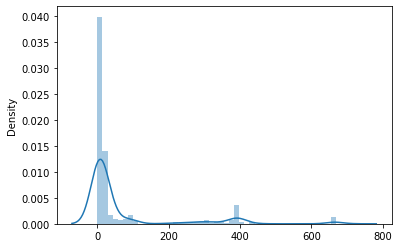

In [38]:
sns.distplot(data_df);

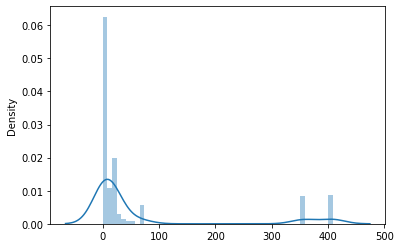

In [39]:
data1 = pd.DataFrame(cap(data_df))
sns.distplot(data1);

In [40]:
#handling outliers
def ub(s):
    iqr = (np.quantile(s, 0.75))-(np.quantile(s, 0.25))
    upper_bound = np.quantile(s, 0.75)+(1.5*iqr)
    return upper_bound
def lb(s):
    iqr = (np.quantile(s, 0.75))-(np.quantile(s, 0.25))
    lower_bound = np.quantile(s, 0.25)-(1.5*iqr)
    return lower_bound
# function cap
def cap(s):
    s = np.where(s > ub(s), np.median(s), s)
    s = np.where(s < lb(s), np.median(s), s)
    return s

In [41]:
data2 =pd.DataFrame(cap(data_df))
data2.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0.0,0.538,6.575,7.9679,4.0900,1.0,7.9679,15.3,7.9679,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,7.9679,4.9671,2.0,7.9679,17.8,7.9679,9.14,21.0
2,0.02729,0.0,7.07,0.0,0.469,7.185,7.9679,4.9671,2.0,7.9679,17.8,7.9679,4.03,34.0
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8000,6.0622,3.0,7.9679,18.7,7.9679,2.94,33.0
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2000,6.0622,3.0,7.9679,18.7,7.9679,5.33,36.0


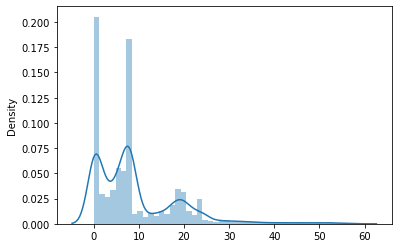

In [42]:
sns.distplot(data2)

# Splitting Data

In [45]:

from sklearn.model_selection import train_test_split



X=data_df.drop("MEDV",axis=1)
y=data_df['MEDV']



X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)




In [48]:
!pip install shap

     |████████████████████████████████| 371 kB 7.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for shap: filename=shap-0.40.0-cp37-cp37m-linux_x86_64.whl size=509252 sha256=d127db67ecd33c1145eee56b4165ef0c514550fdde8e4bbcd3703dbb6e849502
  Stored in directory: /root/.cache/pip/wheels/ec/35/84/e304841ac4b910bc95fe9a6e5302eb2507b4333728851dcbfb
Successfully built shap


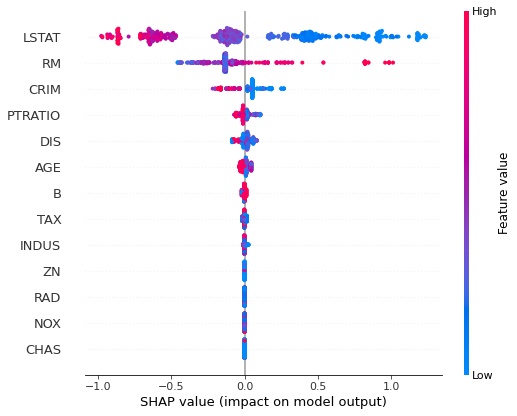

Mean Squared Error of LGB Methods:  71.923393877482


In [49]:
import shap
import lightgbm as lgb
train_data=lgb.Dataset(X_train,label=y_train)
params = {'learning_rate':0.001}
model= lgb.train(params, train_data, 100)
y_pred=model.predict(X_test)
from sklearn.metrics import mean_squared_error
rmse=mean_squared_error(y_pred,y_test)**0.5

model.params["objective"] = "regression"
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)
shap.summary_plot(shap_values, X)

print("Mean Squared Error of LGB Methods: ",mean_squared_error(y_pred,y_test))

Jika menggunakan perhitungan linear korelasi dari heatmap, yang memiliki korelasi tinggi terhadapa terhadap MEDV adalah LSTAT, PTRATIO, TAX, INDUS dan RM. Tetapi ketika menggunakan LGB, terdapat fitur lain yang dianggap memiliki korelasi tinggi terhadap MEDV, yaitu AGE dan DIS. LGB mampu menghitung variabel data non linier. 